In [91]:
import pickle
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import os


In [92]:
### Read feature importances from results.pickle and assemble the results as a dataframe
# unpickle results.pickle, which stores a nested dictionary
# the keys are tuples listing each classification job / model combo
with open(os.path.join('..', 'Modeling', 'results.pickle'), 'rb') as file:
    all_results = pickle.load(file)
# assemble a dictionary storing featuer importance information for each classification job / model combo
# the values are dicts of feature importances for that specific model
feature_importance_per_tuple = {tup: all_results[tup]['final_results']['feature_importance_final_importances'] for tup in all_results.keys()}
# format this information as a multiindexed dataframe with information for every model type
final_importances = pd.DataFrame(feature_importance_per_tuple, index=all_results[list(all_results.keys())[0]]['train_test_split'][0].columns.tolist())
final_importances.columns = pd.MultiIndex.from_arrays(list(zip(*final_importances.columns.tolist())), names=['Classification Task', 'Model Type'])
final_importances.index.name = "Feature"
# Break the multiindexed dataframe one for each model type, and display the data for each frame
dataframes = dict()
for file_value, group_df in final_importances.T.groupby(level=1):
    dataframes[file_value] = group_df.droplevel(level='Model Type', axis=0)
    print(f'{file_value} feature importances:')
    display(dataframes[file_value])

KNeighborsClassifier feature importances:


Feature,Lacunarity,Total Length (microns),Endpoints,HGU (microns),Branchpoints,Box-Counting Fractal Dimension,Curvature_50.0,% High Density Matrix,Alignment,Branchpoints/Total Length,Endpoints/Total Length,Average Fiber Length,Average Fiber Thickness
Classification Task,,,,,,,,,,,,,
All Cells,0.049686,0.043003,0.035109,0.038161,0.037172,0.039726,0.031552,0.050013,0.032790,0.037610,0.035300,0.034224,0.042641
L1 and RL,0.122831,0.101783,0.084769,0.093847,0.079982,0.091493,0.101626,0.139728,0.094466,0.092909,0.091869,0.086961,0.110462
L2 and RL,0.112970,0.104963,0.086288,0.098034,0.089036,0.090926,0.080008,0.187814,0.067780,0.078068,0.091664,0.072714,0.116366
L3 and RL,0.118344,0.068033,0.051223,0.068427,0.062109,0.060713,0.050367,0.131502,0.050097,0.061583,0.053802,0.053174,0.056573
L1 and L2 and RL,0.079535,0.072136,0.057811,0.061849,0.056441,0.058102,0.054843,0.098161,0.055541,0.057343,0.057123,0.056696,0.072682
Monoblast and RL,0.106183,0.105116,0.066812,0.056966,0.057632,0.077844,0.041944,0.130132,0.043534,0.076356,0.065203,0.063815,0.079879
Myeloblast and RL,0.112045,0.076251,0.067643,0.066736,0.070571,0.076111,0.043006,0.196286,0.051785,0.068811,0.065567,0.056138,0.103795
All blasts and RL,0.218162,0.185584,0.185568,0.202183,0.186578,0.201330,0.190203,0.244197,0.198417,0.188076,0.180528,0.198648,0.197331


RandomForestClassifier feature importances:


Feature,Lacunarity,Total Length (microns),Endpoints,HGU (microns),Branchpoints,Box-Counting Fractal Dimension,Curvature_50.0,% High Density Matrix,Alignment,Branchpoints/Total Length,Endpoints/Total Length,Average Fiber Length,Average Fiber Thickness
Classification Task,,,,,,,,,,,,,
All Cells,0.053674,0.043087,0.034132,0.036915,0.035105,0.044365,0.019863,0.053395,0.018814,0.031678,0.028214,0.028012,0.044297
L1 and RL,0.117367,0.086330,0.058615,0.072874,0.056627,0.054551,0.058955,0.120151,0.059382,0.078180,0.067373,0.065184,0.104291
L2 and RL,0.140894,0.121696,0.075806,0.117236,0.084258,0.111580,0.059569,0.245956,0.042564,0.056145,0.074030,0.071719,0.072687
L3 and RL,0.131791,0.050706,0.048222,0.052722,0.045026,0.046225,0.023674,0.177352,0.030606,0.046854,0.043634,0.042408,0.054990
L1 and L2 and RL,0.083786,0.085621,0.049939,0.066064,0.047864,0.063496,0.041339,0.118435,0.031493,0.056198,0.047909,0.050338,0.086194
Monoblast and RL,0.120343,0.175565,0.112413,0.123999,0.105743,0.082892,0.020432,0.185801,0.028298,0.105743,0.107672,0.105136,0.090155
Myeloblast and RL,0.143283,0.081192,0.092423,0.108127,0.082663,0.115245,0.046398,0.306337,0.051090,0.139595,0.144483,0.099656,0.134879
All blasts and RL,0.091243,0.083494,0.081693,0.089630,0.078878,0.075413,0.069348,0.142117,0.063641,0.073115,0.059921,0.073507,0.071010


In [93]:
### Helper functions (developed with help from Chat GPT)
# function to sort columns by their sum, so that the most
# important important features show up on the left in each plot
# help from Chat GPT
sort_columns_by_colsum = lambda df: df.loc[:, df.sum().sort_values(ascending=False).index]
# function to clip negative values in dataframes at zero
# function to normalize dataframes by their row sum
normalize = lambda df: df.div(df.sum(axis=1), axis=0)


# function to display heatmaps
def custom_heatmap(df, title, show_title=True, top_labels=False, normalize_rows=True, sort_columns=True):
    # normalize by row sum if desired
    if normalize_rows:
        # in this case, the negative values (which are very small) are clipped
        # so they can't interfere with normalization
        df = df.clip(lower=0)
        # then the values are divided by the sum of their row, showing
        # relative importance of each feature when compared to the others
        df = normalize(df)
    # sort columns if desired
    if sort_columns:
        df = sort_columns_by_colsum(df)
    if normalize_rows:
        # display a heatmap with default colormap
        sns.heatmap(df, vmin=0, vmax=0.45)
    # otherwise, 
    else:
        # display a with coolwarm, since there are some (very slightly) negative values
        sns.heatmap(df, cmap='coolwarm', center=0)
    
    if show_title:
        plt.title(title)
    if top_labels:
        # get the x axis labels to sit on top of the figure nicely at an angle (help from Chat GPT)
        plt.gca().xaxis.set_ticks_position('top')
        plt.gca().xaxis.set_label_position('top')
        for label in plt.gca().get_xticklabels():
            label.set_rotation(45)
            label.set_horizontalalignment('left')
            label.set_verticalalignment('bottom')
    else:
        # get the x axis labels to sit on the bottom of the figure at an angle
        plt.xticks(rotation=45, ha='right')
    plt.tight_layout()


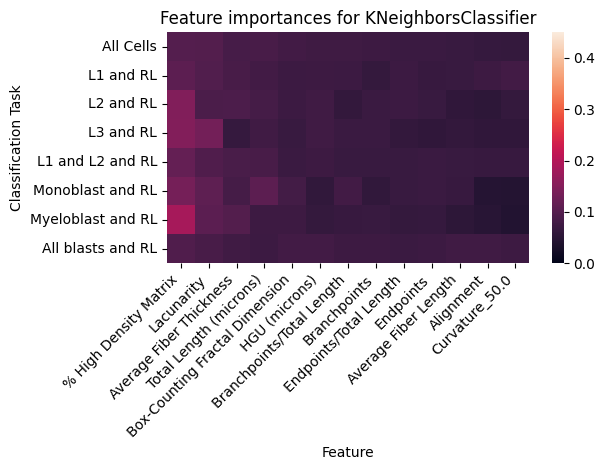

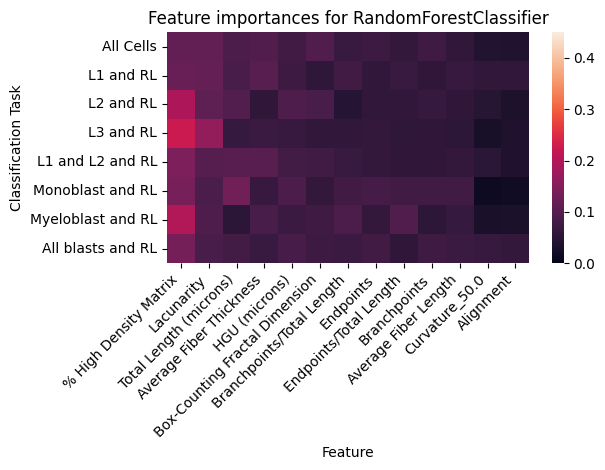

In [94]:
# plot heatmaps
for name, dataframe in dataframes.items():
    custom_heatmap(dataframe, f"Feature importances for {name}")
    plt.savefig(f"{name}_feature_importances_600dpi.png", dpi=600)
    plt.show()